In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')
target_df=pd.read_csv('data/train_target.csv')

train_df.shape,test_df.shape,target_df.shape

((132029, 104), (23561, 104), (132029, 2))

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132029 entries, 0 to 132028
Columns: 104 entries, id to isNew
dtypes: float64(3), int64(101)
memory usage: 104.8 MB


In [4]:
submit_id=test_df['id']
submit_id.shape

(23561,)

In [5]:
target_df=target_df.drop('id',axis=1)
target_df.head()

,target
0,0
1,0
2,0
3,0
4,0


In [6]:
train_df.shape[0]

132029

In [7]:
test_df.shape[0]

23561

In [8]:
all_data=pd.concat([train_df,test_df])
all_data.shape

(155590, 104)

In [9]:
all_data.head(20)

,id,certId,loanProduct,gender,age,dist,edu,job,lmt,basicLevel,...,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew
0,1,640582,1,2,27,640500,0,8,5.963,3,...,-999,0,9,6,1,0,1,0,0,1
1,2,621023,2,2,25,640600,0,3,6.467,3,...,99,11,6,5,1,0,1,0,0,1
2,3,641283,1,2,37,641200,70,5,0.596,1,...,70,0,1,6,0,0,0,0,0,1
3,4,340821,3,2,29,340821,0,4,6.300,3,...,-999,-999,13,6,1,0,1,0,0,1
4,5,732628,2,2,22,732628,0,2,6.700,2,...,99,11,8,3,1,0,1,0,0,1
5,6,610221,3,2,27,610221,0,4,5.867,3,...,-999,-999,11,3,1,0,1,1,0,1
6,7,629004,1,1,31,620100,0,3,12.630,1,...,-999,0,17,5,1,1,0,1,0,1
7,8,822223,1,2,32,822223,0,3,1.096,1,...,99,0,14,6,1,1,1,0,0,1
8,9,632503,1,2,27,640700,0,4,0.830,2,...,-999,0,2,6,0,0,1,0,0,1
9,10,722323,2,2,37,722300,0,3,7.667,1,...,-999,12,17,5,0,0,1,0,0,1


In [10]:
#将时间段分为6段
# bins=[0,6,10,13,17,20,23]
# labels=['清晨','上午','中午','下午','傍晚','晚上']
# all_data['setuphour_one']=pd.cut(all_data['setupHour'],bins=bins,labels=labels)
# all_data.head()

In [11]:
#将时间段分为时辰
# bins=[0,2,4,6,8,10,12,14,16,18,20,22,24]
# labels=['子','丑','寅','卯','辰','巳','午','未','申','酉','戌','亥']
# all_data['setuphour_two']=pd.cut(all_data['setupHour'],bins=bins,labels=labels)
# all_data.head()

In [12]:
#将时间段分为两类
# bins=[0,6,19,24]
# labels=['后半夜','白天','前半夜']
# all_data['setuphout_three']=pd.cut(all_data['setupHour'],bins=bins,labels=labels)
# all_data.head()

In [13]:
all_data["target"]=target_df

# 1、删除ID

In [14]:
#all_data=all_data.drop('id',axis=1)
all_data.head(3)

,id,certId,loanProduct,gender,age,dist,edu,job,lmt,basicLevel,...,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew,target
0,1,640582,1,2,27,640500,0,8,5.963,3,...,0,9,6,1,0,1,0,0,1,0
1,2,621023,2,2,25,640600,0,3,6.467,3,...,11,6,5,1,0,1,0,0,1,0
2,3,641283,1,2,37,641200,70,5,0.596,1,...,0,1,6,0,0,0,0,0,1,0


# 2、certId证件号

In [15]:
all_data['certId']=all_data['certId'].astype(str)

all_data['certId_province']=all_data['certId'].apply(lambda x:str(x)[0:2])
all_data['certId_city']=all_data['certId'].apply(lambda x:str(x)[2:4])
all_data['certId_county']=all_data['certId'].apply(lambda x:str(x)[4:6])

all_data=all_data.drop('certId',axis=1)

In [16]:
all_data['certId_province'].dtypes

dtype('O')

In [17]:
for i in ['certId_province','certId_city','certId_county']:
    all_data[i]=all_data[i].astype(int)

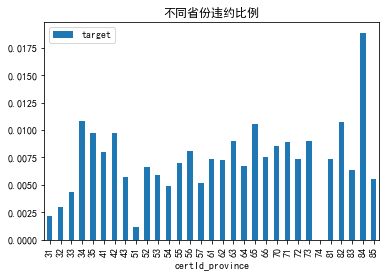

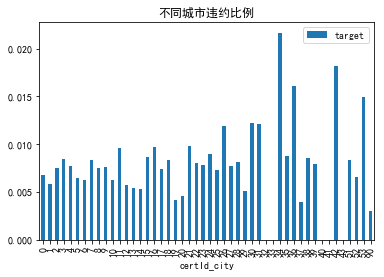

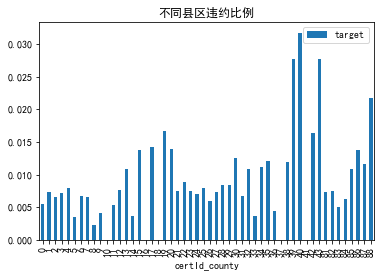

In [18]:
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

all_data[['certId_province','target']].groupby('certId_province').mean().plot.bar()
plt.title("不同省份违约比例");

all_data[['certId_city','target']].groupby('certId_city').mean().plot.bar()
plt.title("不同城市违约比例");

all_data[['certId_county','target']].groupby('certId_county').mean().plot.bar()
plt.title("不同县区违约比例");


# 3、dist地区

In [19]:
all_data['dist']=all_data['dist'].astype(str)

all_data['dist_province']=all_data['dist'].apply(lambda x:str(x)[0:2])
all_data['dist_city']=all_data['dist'].apply(lambda x:str(x)[2:4])
all_data['dist_county']=all_data['dist'].apply(lambda x :str(x)[4:6])

all_data.drop('dist',axis=1,inplace=True)

for i in ['dist_province','dist_city','dist_county']:
    all_data[i]=all_data[i].astype(int)
# print(all_data.head(3))
all_data['dist_province'].dtypes

dtype('int32')

In [20]:
pd.set_option('display.max_columns',400)

In [21]:
all_data.head(3)

,id,loanProduct,gender,age,edu,job,lmt,basicLevel,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,certValidBegin,certValidStop,bankCard,ethnic,residentAddr,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew,target,certId_province,certId_city,certId_county,dist_province,dist_city,dist_county
0,1,1,2,27,0,8,5.963,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3637094400,3.952714e+09,-999.0,0,640513,-999,0,9,6,1,0,1,0,0,1,0,64,5,82,64,5,0
1,2,2,2,25,0,3,6.467,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,3739996800,4.371149e+09,622848079.0,0,621023,99,11,6,5,1,0,1,0,0,1,0,62,10,23,64,6,0
2,3,1,2,37,70,5,0.596,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3347913600,3.979066e+09,-999.0,0,641204,70,0,1,6,0,0,0,0,0,1,0,64,12,83,64,12,0


# 4、证件起始日和终止日

In [22]:
all_data['Valid_date']=all_data['certValidStop']-all_data['certValidBegin']

# 5、放款卡号

In [23]:
mean_bankcard=all_data.loc[all_data['bankCard']!=-999,'bankCard'].mean()

In [24]:
all_data.loc[all_data['bankCard']==-999,'bankCard']=mean_bankcard  #-999填充平均数

In [25]:
all_data['bankCard'].isnull().sum()

20152

In [26]:
mode=all_data['bankCard'].mode() #找出众数

In [27]:
mode[0]

621855941.2138342

In [28]:
all_data['bankCard'].dtypes

dtype('float64')

In [29]:
# all_data['bankCard']=all_data['bankCard'].astype(int)

In [30]:
all_data['bankCard']=all_data['bankCard'].fillna(mode[0])   #nan填充众数

In [31]:
all_data['bankCard'].isnull().sum()

0

In [32]:
all_data['bankCard']=all_data['bankCard'].astype(int)
all_data.head()

,id,loanProduct,gender,age,edu,job,lmt,basicLevel,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,certValidBegin,certValidStop,bankCard,ethnic,residentAddr,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew,target,certId_province,certId_city,certId_county,dist_province,dist_city,dist_county,Valid_date
0,1,1,2,27,0,8,5.963,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3637094400,3.952714e+09,621855941,0,640513,-999,0,9,6,1,0,1,0,0,1,0,64,5,82,64,5,0,315619200.0
1,2,2,2,25,0,3,6.467,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,3739996800,4.371149e+09,622848079,0,621023,99,11,6,5,1,0,1,0,0,1,0,62,10,23,64,6,0,631152000.0
2,3,1,2,37,70,5,0.596,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3347913600,3.979066e+09,621855941,0,641204,70,0,1,6,0,0,0,0,0,1,0,64,12,83,64,12,0,631152000.0
3,4,3,2,29,0,4,6.300,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,3,4,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3713385600,4.344538e+09,621855941,0,-999,-999,-999,13,6,1,0,1,0,0,1,0,34,8,21,34,8,21,631152000.0
4,5,2,2,22,0,2,6.700,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,3652214400,3.967834e+09,622700392,4,732628,99,11,8,3,1,0,1,0,0,1,0,73,26,28,73,26,28,315619200.0


In [33]:
all_data['bankCard']=all_data['bankCard'].astype(str)
all_data['bank_type']=all_data['bankCard'].apply(lambda x:str(x)[0:6])
all_data['bank_city']=all_data['bankCard'].apply(lambda x:str(x)[6:9])
all_data.drop('bankCard',axis=1,inplace=True)

l=['bank_type','bank_city']
for i in l:
    all_data[i]=all_data[i].astype(int)
    
all_data.head()

,id,loanProduct,gender,age,edu,job,lmt,basicLevel,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,certValidBegin,certValidStop,ethnic,residentAddr,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew,target,certId_province,certId_city,certId_county,dist_province,dist_city,dist_county,Valid_date,bank_type,bank_city
0,1,1,2,27,0,8,5.963,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3637094400,3.952714e+09,0,640513,-999,0,9,6,1,0,1,0,0,1,0,64,5,82,64,5,0,315619200.0,621855,941
1,2,2,2,25,0,3,6.467,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,3739996800,4.371149e+09,0,621023,99,11,6,5,1,0,1,0,0,1,0,62,10,23,64,6,0,631152000.0,622848,79
2,3,1,2,37,70,5,0.596,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3347913600,3.979066e+09,0,641204,70,0,1,6,0,0,0,0,0,1,0,64,12,83,64,12,0,631152000.0,621855,941
3,4,3,2,29,0,4,6.300,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,3,4,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3713385600,4.344538e+09,0,-999,-999,-999,13,6,1,0,1,0,0,1,0,34,8,21,34,8,21,631152000.0,621855,941
4,5,2,2,22,0,2,6.700,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,3652214400,3.967834e+09,4,732628,99,11,8,3,1,0,1,0,0,1,0,73,26,28,73,26,28,315619200.0,622700,392


In [34]:
# all_data=all_data.drop('bankCard',axis=1)

In [35]:
# all_data['certValidBegin']=(all_data['certValidBegin']-all_data['certValidBegin'].min())/(all_data['certValidBegin'].max()-all_data['certValidBegin'].min())

In [36]:
# for i in ['certValidStop','residentAddr','Valid_date']:
#     all_data[i]=(all_data[i]-all_data[i].min())/(all_data[i].max()-all_data[i].min())

In [37]:
# all_data.head()

# 第六次特征处理

### 1、edu学历

In [38]:
all_data['edu'].value_counts()

 0      152363
 40       1225
 30       1042
 20        454
 70        355
 60         71
 10         45
-999        31
 47          4
Name: edu, dtype: int64

In [39]:
all_data.loc[all_data['edu']==-999,'edu']=80
all_data.loc[all_data['edu']==47,'edu']=50
all_data['edu'].value_counts()

0     152363
40      1225
30      1042
20       454
70       355
60        71
10        45
80        31
50         4
Name: edu, dtype: int64

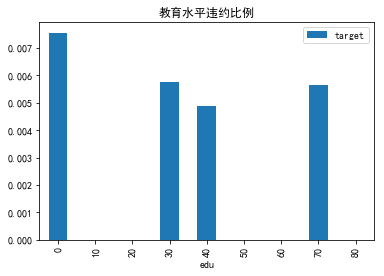

In [40]:
all_data[['edu','target']].groupby('edu').mean().plot.bar()
plt.title("教育水平违约比例");

### 2、job单位类型

In [41]:
all_data['job'].value_counts()

16    63065
4     30779
3     28988
2     10410
1      8276
5      4744
6      4190
7      3531
8      1565
10       35
13        2
12        2
14        1
11        1
9         1
Name: job, dtype: int64

将最少的7类合并为一类，类名为9

In [42]:
all_data.loc[all_data['job']==8,'job']=9
all_data.loc[all_data['job']==10,'job']=9
all_data.loc[all_data['job']==13,'job']=9
all_data.loc[all_data['job']==12,'job']=9
all_data.loc[all_data['job']==11,'job']=9
all_data.loc[all_data['job']==14,'job']=9

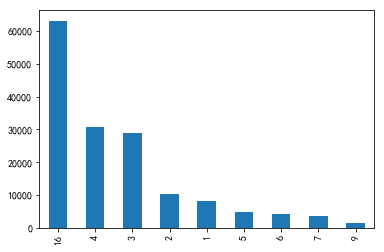

In [43]:
all_data['job'].value_counts().plot.bar()

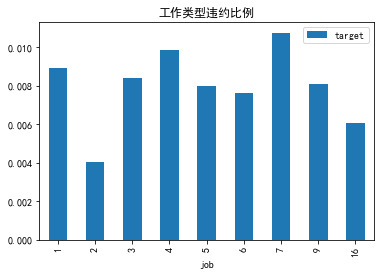

In [44]:
all_data[['job','target']].groupby('job').mean().plot.bar()
plt.title("工作类型违约比例");

### 3、age年龄进行分箱

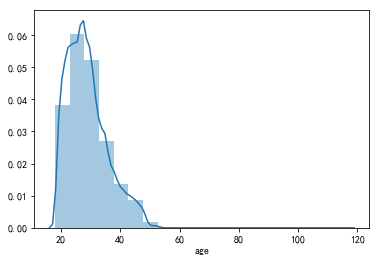

In [45]:
sns.distplot(all_data['age'],bins=20)

In [46]:
all_data['age'].describe()

count    155590.000000
mean         28.815207
std           6.845345
min          18.000000
25%          24.000000
50%          28.000000
75%          33.000000
max         117.000000
Name: age, dtype: float64

In [47]:
#第八次特征处理7-1
all_data['age_cat']=pd.cut(all_data['age'],bins=[18,25,32,39,45,120],labels=[1,2,3,4,5])  #例如18-25对应1
all_data.head()

,id,loanProduct,gender,age,edu,job,lmt,basicLevel,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,certValidBegin,certValidStop,ethnic,residentAddr,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew,target,certId_province,certId_city,certId_county,dist_province,dist_city,dist_county,Valid_date,bank_type,bank_city,age_cat
0,1,1,2,27,0,9,5.963,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3637094400,3.952714e+09,0,640513,-999,0,9,6,1,0,1,0,0,1,0,64,5,82,64,5,0,315619200.0,621855,941,2
1,2,2,2,25,0,3,6.467,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,3739996800,4.371149e+09,0,621023,99,11,6,5,1,0,1,0,0,1,0,62,10,23,64,6,0,631152000.0,622848,79,1
2,3,1,2,37,70,5,0.596,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3347913600,3.979066e+09,0,641204,70,0,1,6,0,0,0,0,0,1,0,64,12,83,64,12,0,631152000.0,621855,941,3
3,4,3,2,29,0,4,6.300,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,3,4,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3713385600,4.344538e+09,0,-999,-999,-999,13,6,1,0,1,0,0,1,0,34,8,21,34,8,21,631152000.0,621855,941,2
4,5,2,2,22,0,2,6.700,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,3652214400,3.967834e+09,4,732628,99,11,8,3,1,0,1,0,0,1,0,73,26,28,73,26,28,315619200.0,622700,392,1


In [48]:
all_data.drop('age',axis=1,inplace=True)

In [49]:
all_data['age_cat'].value_counts()

2    60005
1    55604
3    25737
4     9887
5     3804
Name: age_cat, dtype: int64

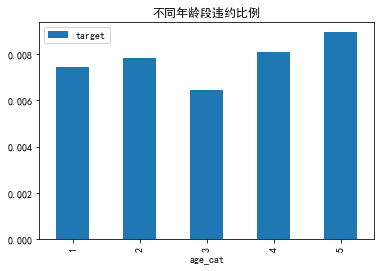

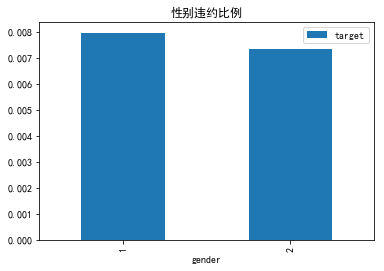

In [50]:
all_data[['age_cat','target']].groupby('age_cat').mean().plot.bar()
plt.title("不同年龄段违约比例");


all_data[['gender','target']].groupby('gender').mean().plot.bar()
plt.title("性别违约比例");

In [51]:
# all_data.loc[all_data['age']>45,'age']=45

In [52]:
# sns.distplot(all_data['lmt'],bins=15)

In [53]:
# all_data.loc[all_data['lmt']>25,'lmt']=25

### 4、basicLevel

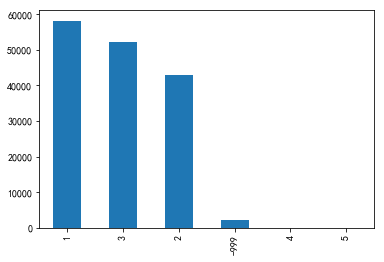

In [54]:
all_data['basicLevel'].value_counts().plot.bar()

In [55]:
all_data.loc[all_data['basicLevel']==-999,'basicLevel']=0

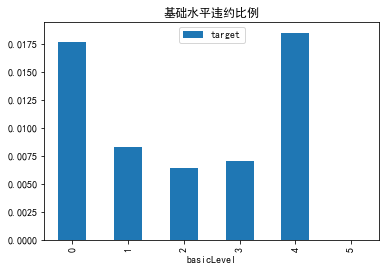

In [56]:
all_data[['basicLevel','target']].groupby('basicLevel').mean().plot.bar()
plt.title("基础水平违约比例");

### 5、residentAddr and  highestEdu

In [57]:
mean_residentaddr=all_data.loc[all_data['residentAddr']!=-999,'residentAddr'].mean()
a=int(mean_residentaddr)

In [58]:
all_data.loc[all_data['residentAddr']==-999,'residentAddr']=a

In [59]:
all_data['highestEdu'].value_counts()

-999    128001
 99      24731
 40       1156
 30        903
 20        395
 70        358
 10         34
 60         10
 50          2
Name: highestEdu, dtype: int64

In [60]:
all_data.loc[all_data['highestEdu']==-999,'highestEdu']=0
all_data.loc[all_data['highestEdu']==99,'highestEdu']=80

In [61]:
all_data['highestEdu'].value_counts()

0     128001
80     24731
40      1156
30       903
20       395
70       358
10        34
60        10
50         2
Name: highestEdu, dtype: int64

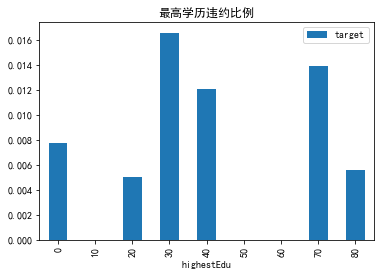

In [62]:
all_data[['highestEdu','target']].groupby('highestEdu').mean().plot.bar()
plt.title("最高学历违约比例");

### 6、linkRela

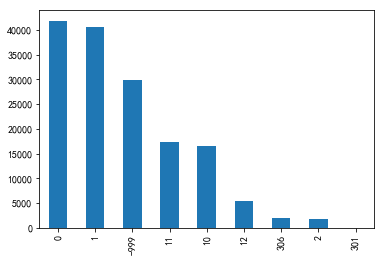

In [63]:
all_data['linkRela'].value_counts().plot.bar()

In [64]:
all_data.loc[all_data['linkRela']==-999,'linkRela']=6
all_data.loc[all_data['linkRela']==11,'linkRela']=4
all_data.loc[all_data['linkRela']==10,'linkRela']=5
for i in [12,306,2,301]:
    all_data.loc[all_data['linkRela']==i,'linkRela']=3

In [65]:
all_data['linkRela'].value_counts()

0    41835
1    40568
6    29857
4    17375
5    16624
3     9331
Name: linkRela, dtype: int64

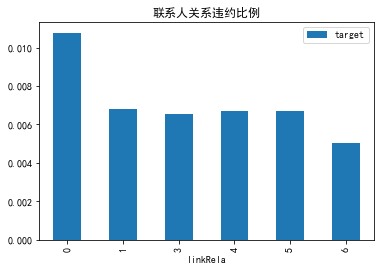

In [66]:
all_data[['linkRela','target']].groupby('linkRela').mean().plot.bar()
plt.title("联系人关系违约比例");

In [67]:
all_data['weekday'].value_counts()

6    41650
5    26428
4    21385
3    19809
1    17421
2    16303
7    12594
Name: weekday, dtype: int64

In [68]:
all_data.head()

,id,loanProduct,gender,edu,job,lmt,basicLevel,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,certValidBegin,certValidStop,ethnic,residentAddr,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew,target,certId_province,certId_city,certId_county,dist_province,dist_city,dist_county,Valid_date,bank_type,bank_city,age_cat
0,1,1,2,0,9,5.963,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3637094400,3.952714e+09,0,640513,0,0,9,6,1,0,1,0,0,1,0,64,5,82,64,5,0,315619200.0,621855,941,2
1,2,2,2,0,3,6.467,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,3739996800,4.371149e+09,0,621023,80,4,6,5,1,0,1,0,0,1,0,62,10,23,64,6,0,631152000.0,622848,79,1
2,3,1,2,70,5,0.596,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3347913600,3.979066e+09,0,641204,70,0,1,6,0,0,0,0,0,1,0,64,12,83,64,12,0,631152000.0,621855,941,3
3,4,3,2,0,4,6.300,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,3,4,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3713385600,4.344538e+09,0,715867,0,6,13,6,1,0,1,0,0,1,0,34,8,21,34,8,21,631152000.0,621855,941,2
4,5,2,2,0,2,6.700,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,3652214400,3.967834e+09,4,732628,80,4,8,3,1,0,1,0,0,1,0,73,26,28,73,26,28,315619200.0,622700,392,1


In [69]:
# all_data['bank_city'].value_counts()

### 7、对lmt进行分析操作

In [70]:
all_data.loc[all_data['lmt']>25,'lmt']=25

### 8、residentAddr拆分

In [71]:
all_data.loc[all_data['residentAddr'].isnull(),'residentAddr']

Series([], Name: residentAddr, dtype: int64)

## 删除id和target

In [72]:
all_data=all_data.drop('id',axis=1)
all_data=all_data.drop('target',axis=1)
all_data.head(3)

,loanProduct,gender,edu,job,lmt,basicLevel,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,certValidBegin,certValidStop,ethnic,residentAddr,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew,certId_province,certId_city,certId_county,dist_province,dist_city,dist_county,Valid_date,bank_type,bank_city,age_cat
0,1,2,0,9,5.963,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3637094400,3.952714e+09,0,640513,0,0,9,6,1,0,1,0,0,1,64,5,82,64,5,0,315619200.0,621855,941,2
1,2,2,0,3,6.467,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,3739996800,4.371149e+09,0,621023,80,4,6,5,1,0,1,0,0,1,62,10,23,64,6,0,631152000.0,622848,79,1
2,1,2,70,5,0.596,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3347913600,3.979066e+09,0,641204,70,0,1,6,0,0,0,0,0,1,64,12,83,64,12,0,631152000.0,621855,941,3


In [73]:
#将离散的变量进行str，并进行哑编码，将连续型数据进行标准化
one_hot=['loanProduct','gender','age_cat','edu','job','basicLevel','ethnic','highestEdu','linkRela','setupHour','weekday','isNew',
        'dist_county','dist_city','dist_province','certId_county','certId_city','certId_province'
        ]
stand=['lmt','certValidBegin','certValidStop','Valid_date','bank_type','bank_city','residentAddr']
for i in one_hot:
    all_data[i]=all_data[i].astype(str)
one_hot_encoded=all_data[one_hot]
standard=all_data[stand]

In [74]:
#哑编码
one_hot_encoded=pd.get_dummies(one_hot_encoded,sparse=True)
one_hot_encoded.shape

(155590, 395)

In [75]:
#标准化
for j in stand:
    mi=standard[j].min()
    ma=standard[j].max()
    standard[j]=(standard[j]-mi)/(ma-mi)

In [76]:
standard.shape

(155590, 7)

In [77]:
all_data=all_data.drop(['loanProduct','gender','age_cat','edu','job','basicLevel','ethnic','highestEdu','linkRela','setupHour','weekday','isNew',
                       'lmt','certValidBegin','certValidStop','residentAddr','certId_province','certId_city','certId_county','dist_province',
                       'dist_city','dist_county','Valid_date','bank_type','bank_city'],axis=1)
all_data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,3,4,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0


In [78]:
all_feature=pd.concat([all_data,one_hot_encoded,standard],axis=1)
all_feature.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,loanProduct_1,loanProduct_2,loanProduct_3,gender_1,gender_2,age_cat_1.0,age_cat_2.0,age_cat_3.0,age_cat_4.0,age_cat_5.0,age_cat_nan,edu_0,edu_10,edu_20,edu_30,edu_40,edu_50,edu_60,edu_70,edu_80,job_1,job_16,job_2,job_3,job_4,job_5,job_6,job_7,job_9,basicLevel_0,basicLevel_1,basicLevel_2,basicLevel_3,basicLevel_4,basicLevel_5,ethnic_0,ethnic_1,ethnic_10,ethnic_11,ethnic_12,ethnic_13,ethnic_14,ethnic_15,ethnic_16,ethnic_17,ethnic_18,ethnic_19,ethnic_2,ethnic_20,ethnic_21,ethnic_22,ethnic_23,ethnic_24,ethnic_25,ethnic_26,ethnic_27,ethnic_28,ethnic_29,ethnic_3,ethnic_30,ethnic_31,ethnic_32,ethnic_33,ethnic_34,ethnic_35,ethnic_36,ethnic_37,ethnic_38,ethnic_39,ethnic_4,ethnic_40,ethnic_41,ethnic_42,ethnic_43,ethnic_44,ethnic_45,ethnic_46,ethnic_47,ethnic_48,ethnic_5,ethnic_6,ethnic_7,ethnic_8,ethnic_9,highestEdu_0,highestEdu_10,highestEdu_20,highestEdu_30,highestEdu_40,highestEdu_50,highestEdu_60,highestEdu_70,highestEdu_80,linkRela_0,linkRela_1,linkRela_3,linkRela_4,linkRela_5,linkRela_6,setupHour_0,setupHour_1,setupHour_10,setupHour_11,setupHour_12,setupHour_13,setupHour_14,setupHour_15,setupHour_16,setupHour_17,setupHour_18,setupHour_19,setupHour_2,setupHour_20,setupHour_21,setupHour_22,setupHour_23,...,dist_city_25,dist_city_26,dist_city_27,dist_city_28,dist_city_29,dist_city_3,dist_city_30,dist_city_31,dist_city_32,dist_city_33,dist_city_34,dist_city_35,dist_city_36,dist_city_37,dist_city_38,dist_city_39,dist_city_4,dist_city_40,dist_city_41,dist_city_42,dist_city_43,dist_city_5,dist_city_51,dist_city_52,dist_city_53,dist_city_6,dist_city_7,dist_city_8,dist_city_9,dist_city_90,dist_province_11,dist_province_31,dist_province_32,dist_province_33,dist_province_34,dist_province_35,dist_province_41,dist_province_42,dist_province_43,dist_province_51,dist_province_52,dist_province_53,dist_province_54,dist_province_55,dist_province_56,dist_province_57,dist_province_61,dist_province_62,dist_province_63,dist_province_64,dist_province_65,dist_province_66,dist_province_70,dist_province_71,dist_province_72,dist_province_73,dist_province_74,dist_province_81,dist_province_82,dist_province_83,dist_province_84,dist_province_85,certId_county_0,certId_county_1,certId_county_10,certId_county_11,certId_county_12,certId_county_13,certId_county_14,certId_county_15,certId_county_16,certId_county_17,certId_county_18,certId_county_19,certId_county_2,certId_county_20,certId_county_21,certId_county_22,certId_county_23,certId_county_24,certId_county_25,certId_county_26,certId_county_27,certId_county_28,certId_county_29,certId_county_3,certId_county_30,certId_county_31,certId_county_32,certId_county_33,certId_county_34,certId_county_35,certId_county_36,certId_county_37,certId_county_38,certId_county_39,certId_county_4,certId_county_40,certId_county_41,certId_county_42,certId_county_43,certId_county_5,certId_county_6,certId_county_7,certId_county_8,certId_county_81,certId_county_82,certId_county_83,certId_county_84,certId_county_85,certId_county_86,certId_county_87,certId_county_88,certId_county_9,certId_city_0,certId_city_1,certId_city_10,certId_city_11,certId_city_12,certId_city_13,certId_city_14,certId_city_15,certId_city_16,certId_city_17,certId_city_18,certId_city_19,certId_city_2,certId_city_20,certId_city_21,certId_city_22,certId_city_23,certId_city_24,certId_city_25,certId_city_26,certId_city_27,certId_city_28,certId_city_29,certId_city_3,certId_city_30,certId_city_31,certId_city_32,certId_city_33,certId_city_34,certId_city_35,certId_city_36,certId_city_37,certId_city_38,certId_city_39,certId_city_

In [79]:
train=all_feature.iloc[:train_df.shape[0],:]
test=all_feature.iloc[train_df.shape[0]:,:]


In [80]:
train.shape

(132029, 486)

In [81]:
test.shape

(23561, 486)

# 特征选择

In [82]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier  #基于树的特征选择
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf.fit(train, target_df)
# display the relative importance of each attribute
clf.feature_importances_

array([0.00000000e+00, 2.73685241e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.33266753e-06, 0.00000000e+00, 2.07585450e-07, 1.12995680e-05,
       3.09978159e-03, 0.00000000e+00, 7.35122885e-03, 0.00000000e+00,
       1.06511532e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.78101059e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.48670827e-03, 5.02610227e-03, 3.86290540e-03,
       2.94443864e-03, 5.91352647e-04, 4.68248997e-04, 0.00000000e+00,
       5.76372468e-06, 1.71475620e-02, 1.59642513e-02, 7.03579853e-04,
       7.96510925e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.39958650e-03, 0.00000000e+00, 5.14381504e-03,
       1.47976038e-03, 4.98557315e-03, 6.95675635e-03, 4.86109197e-03,
       4.44256194e-03, 3.15346153e-03, 4.17868626e-03, 5.44421083e-03,
       6.47836571e-03, 6.00930835e-03, 5.63201915e-03, 3.36008310e-03,
      

In [83]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
print(train.shape)
print(train_new.shape)

(132029, 486)
(132029, 163)


In [84]:
test_new = model.transform(test)
print(test.shape)
print(test_new.shape)

(23561, 486)
(23561, 163)


In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_new, target_df, test_size=0.2, random_state=42)

# 模型选择

In [86]:
#基本数据分析
import pandas as pd
import numpy as np
#可视化
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#模型， 数据处理，模型融合 相关方法。
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import roc_auc_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')


###  accuracy_score  准确率
###  precision_score  精度
### recall_score 召回率
### roc_auc_score AUC

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_test, y_pred)

In [87]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict_proba(x_test)[:,-1]
roc_auc_score(y_test, y_pred, average='macro', sample_weight=None)

0.6877443420094964

In [ ]:
lr = LogisticRegression()
svc = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=4)
gbdt = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3) #梯度提升树
xgbGBDT = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
clfs = [lr, svc, knn, dt, rf, gbdt, xgbGBDT]
#这里的cross_val_score交叉验证的方法可以帮助我们进行调参，最终得到一组最佳的模型参数，使得测试数据的准确率和泛化能力最佳。
cv_results = []
for classifier in clfs :
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict_proba(x_test)[:,-1]
    cv_results.append(roc_auc_score(y_test, y_pred, average='macro', sample_weight=None))
#算出每个模型的准确率的平均值和标准差
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["LR","SVC",'KNN','decision_tree',"random_forest","GBDT","xgbGBDT"]})
print('cv_res')                      
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("AUC")
g = g.set_title("AUC scores")


# 模型融合

In [ ]:
from sklearn.ensemble import VotingClassifier
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=4)
gbdt = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3)
xgbGBDT = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
voting_clf = VotingClassifier(
    estimators=[('lr', lr) ,('rf', rf), ('gbdt', gbdt),('xgbGBDT', xgbGBDT)],
    voting='soft')
voting_clf.fit(train_new,target_df) #用所有的训练集进行拟合

In [ ]:
from sklearn.metrics import accuracy_score
clfs = [lr, rf, gbdt, xgbGBDT,voting_clf]
#这里的cross_val_score交叉验证的方法可以帮助我们进行调参，最终得到一组最佳的模型参数，使得测试数据的准确率和泛化能力最佳。
kfold = 10
cv_results = []
for classifier in clfs :
    #classifier.fit(x_train,y_train) #上面已经训练好了
    y_pred=classifier.predict_proba(x_test)[:,-1]
    cv_results.append(roc_auc_score(y_test, y_pred, average='macro', sample_weight=None))
#算出每个模型的准确率的平均值和标准差
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["LR","random_forest","GBDT","xgbGBDT","voting_clf"]})
print('cv_res')                      
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("AUC")
g = g.set_title("AUC scores")

In [ ]:
predict_result=voting_clf.predict_proba(test_new)[:,-1]
result = pd.DataFrame({'id':submit_id,'target':predict_result})

result.to_csv("predictions.csv", index=False)

# 排名52/1643  
# 复赛前30

## 总结：
### （1）对特征工程进行改进，选取更具“代表性的”特征
### （2）进行超参数选择，模型调优
###  （3）尝试更多的模型融合策略


# 所用python知识
## pandas数据处理、哑编码等
## matplotlib/seaborn进行绘图
## 机器学习sklearn

# 小组分工
## 数据探索 ：王俊韬 、倪嘉瑞
## 特征工程 ：  杨硕、刘花成
## 模型选择与融合   ：李彬 
